In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.shape

(768, 9)

In [7]:
from sklearn.model_selection import train_test_split
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [33]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=100)


Epoch 1/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0497 - accuracy: 0.9886 - val_loss: 1.1030 - val_accuracy: 0.7857
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0482 - accuracy: 0.9919 - val_loss: 1.1096 - val_accuracy: 0.7857
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0493 - accuracy: 0.9919 - val_loss: 1.1130 - val_accuracy: 0.7857
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0499 - accuracy: 0.9902 - val_loss: 1.1210 - val_accuracy: 0.7792
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0486 - accuracy: 0.9902 - val_loss: 1.1131 - val_accuracy: 0.7857
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0491 - accuracy: 0.9886 - val_loss: 1.1096 - val_accuracy: 0.7857
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0493 - accuracy: 0.9902 - val_loss: 1.1108 - val_accuracy: 0.7857
Epoch 8/100
7/7 [====

In [35]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 1.1021 - accuracy: 0.7792


[1.1020581722259521, 0.7792207598686218]

[]

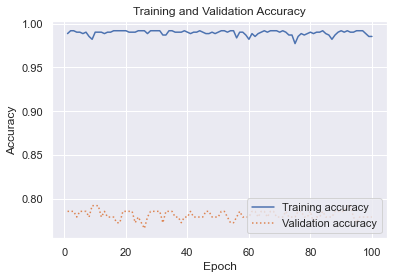

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
